## map()

In [2]:
import numpy as np
import pandas as pd

In [34]:
data = [1,2,3,4,5,6,7,8,9]
#dataframe
df = pd.DataFrame(data, columns = ["x"])

In [4]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [5]:
df["x_plus_2"] = df["x"] + 2
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df["is_even"] = df["x"] % 2 == 0
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,False
1,2,4,4,2,True
2,3,5,9,6,False
3,4,6,16,24,True
4,5,7,25,120,False
5,6,8,36,720,True
6,7,9,49,5040,False
7,8,10,64,40320,True
8,9,11,81,362880,False


In [6]:
df["odd_even"] = df["is_even"].map({False:"odd", True:"even"})
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,False,odd
1,2,4,4,2,True,even
2,3,5,9,6,False,odd
3,4,6,16,24,True,even
4,5,7,25,120,False,odd
5,6,8,36,720,True,even
6,7,9,49,5040,False,odd
7,8,10,64,40320,True,even
8,9,11,81,362880,False,odd


## drop()

In [9]:
df = df.drop("is_even", 1)
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


# Multi Column Select
## double brackets

In [12]:
df[["x", "odd_even"]]

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


# Controlling display options


In [14]:
pd.options.display.max_columns = 60
pd.options.display.max_rows = 6
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
...,...,...,...,...,...
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


# Filtering

In [15]:
df[df["odd_even"] == "odd"]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
2,3,5,9,6,odd
4,5,7,25,120,odd
6,7,9,49,5040,odd
8,9,11,81,362880,odd


In [16]:
df[df.odd_even == "even"]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


# Chining Filters
## | OR

In [18]:
df[(df.odd_even == "even") | (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


## & AND

In [19]:
df[(df.odd_even == "even") & (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even


## Further Chaining

In [20]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1]

1    4
Name: x_plus_2, dtype: int64

# Scatter Matrix()

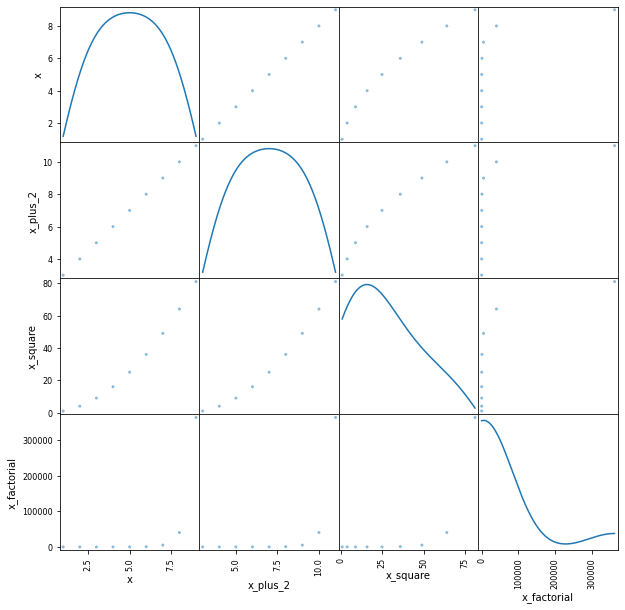

In [26]:
pd.plotting.scatter_matrix(df, diagonal = "kde", figsize = (10,10));

In [27]:
df.describe()

,x,x_plus_2,x_square,x_factorial
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,7.000000,31.666667,45457.000000
std,2.738613,2.738613,28.080242,119758.341137
...,...,...,...,...
50%,5.000000,7.000000,25.000000,120.000000
75%,7.000000,9.000000,49.000000,5040.000000
max,9.000000,11.000000,81.000000,362880.000000


# Reading Data from CSV/TSV Files

In [30]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASIhoutput=csv"
stocks_data = pd.read_csv(url)

ParserError: Error tokenizing data. C error: Expected 141 fields in line 10, saw 2095


In [31]:
stocks_data

NameError: name 'stocks_data' is not defined

In [ ]:
stocks_data["change_amount"] = stocks_data["Close"] - stocks_data["Open"]
stocks_data["change_percentage"] = stocks_data["change_amount"] / stocks_data["Close"]